# Project Overview

In this project, we aim to analyze financial market trends with a focus on sentiment analysis, regional factors, and temporal elements. We will be leveraging Python's capabilities within a Jupyter Notebook environment, making use of its extensive ecosystem of data analysis and visualization libraries.

## Objective

The primary objective is to generate meaningful insights on stock market behavior by considering various factors such as average growth, user-specified time periods, sentiment analysis, and regional impacts. This will provide a comprehensive understanding of market dynamics, assisting investors in making informed decisions.

## Key Features

- **Average Growth Analysis**: We will calculate the average growth of selected stocks over a one-year period to identify overall trends and the stock's performance.

- **Groth vector**: We plot groth vector for each year.

- **Plot fundamentals**: Plot: cash, debt, stock by back, revenue, margin ... over year 

- **User Input Time Period**: Users will have the flexibility to specify their time period of interest for analysis. This allows for customizable insights tailored to individual investment strategies and time horizons.

- **Sentiment Analysis**: Using Natural Language Processing (NLP) techniques, we will perform sentiment analysis on various news articles and social media posts. This analysis will help understand public sentiment towards specific stocks, sectors, or the market as a whole.

- **Sentiment in JSON Format**: Sentiment data will be organized in a structured JSON format, which will include measures such as sentiment score, conflict level, and growth trend. This structured format will make the data easily accessible for further analysis and visualization.

- **Regional Analysis**: We will consider the impact of regional factors on the market. This includes analyzing the sentiment and market performance in different countries or regions. 

- **Pandemic Impact**: An essential aspect of this project is to understand the influence of global events, like the COVID-19 pandemic, on market behavior. We'll analyze the correlation between such events and market fluctuations.

## Methodology

1. **Data Acquisition**: We'll use Python libraries like `yfinance 0.2.18` https://pypi.org/project/yfinance/ for fetching historical market data, and `requests` or `beautifulsoup` for web scraping news articles and social media posts.

2. **Data Processing**: We'll use `pandas` for data manipulation and processing. For NLP tasks, libraries like `nltk` or `spacy` will be used.

3. **Sentiment Analysis**: Sentiment analysis will be performed using machine learning or deep learning techniques, utilizing libraries such as `OpenAI API`, `nltk`, `sklearn`, `tensorflow`, or `pytorch`.

4. **Data Visualization**: We'll utilize `matplotlib` and `seaborn` for data visualization, creating intuitive graphs and plots to represent our findings.

## Future Scope

This project could be extended in several ways:

- Expanding the range of factors considered in the analysis, such as incorporating additional economic indicators or company-specific data.
- Building predictive models to forecast future market trends based on the analyzed factors.
- Creating an interactive dashboard for real-time market sentiment tracking.

By combining financial data with sentiment analysis and regional factors, this project aims to provide a holistic view of market dynamics.


In [2]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

VTI = yf.Ticker("VTI")
VOO = yf.Ticker("VOO")
msft = yf.Ticker("MSFT")

# get all stock info
#print(msft.analyst_price_target)


#from sklearn.preprocessing import MinMaxScaler
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Dropout, LSTM


In [3]:
start = dt.datetime(1998,1,1)
end = dt.datetime(2021,2,1)
VTI_hist = VTI.history(start=start, end=None)
VOO_hist = VOO.history(start=start, end=None)
#VV_hist = VV.history(start=start, end=None)
#VWO_hist = VWO.history(start=start, end=None)
MSTF_hist = msft.history(start=start, end=None)

In [4]:
VTI_hist.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2001-06-15 00:00:00-04:00,37.232794,37.622422,37.064852,37.394020,1067400,0.0,0.0,0.0
2001-06-18 00:00:00-04:00,37.494786,37.561964,37.155544,37.155544,282600,0.0,0.0,0.0
2001-06-19 00:00:00-04:00,37.719845,37.729921,37.105175,37.259682,1777600,0.0,0.0,0.0
2001-06-20 00:00:00-04:00,37.199217,37.669456,37.199217,37.652660,476000,0.0,0.0,0.0
2001-06-21 00:00:00-04:00,37.619049,38.106080,37.535078,37.954933,240400,0.0,0.0,0.0


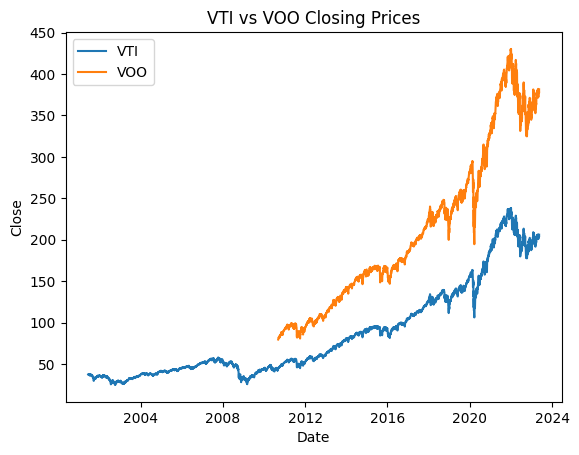

In [5]:
sns.lineplot(data=VTI_hist, x='Date', y='Close', label='VTI')
sns.lineplot(data=VOO_hist, x='Date', y='Close', label='VOO')

plt.title('VTI vs VOO Closing Prices')
plt.legend(loc='upper left')
plt.show()

<Axes: xlabel='Date', ylabel='Close'>

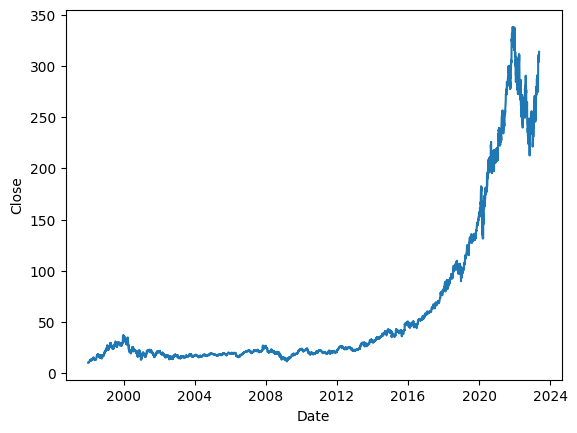

In [6]:
sns.lineplot(data=MSTF_hist,x='Date', y='Close')

In [7]:
df_new = pd.pivot_table(VTI_hist, 
                        index=VTI_hist.index.year, 
                        values=['Open', 'Close', 'Dividends'], 
                        aggfunc={'Open': 'first', 'Close': ['first', 'last', np.mean], 'Dividends': np.sum})
# Flatten the multi-index column names
df_new.columns = ['_'.join(col).strip() for col in df_new.columns.values]

# Calculate the yearly growth based on the first 'Close' and last 'Close' price of the year
df_new['average_growth'] = (df_new['Close_last'] - df_new['Close_first']) / df_new['Close_first']*100

# Rename 'Dividends' to 'yearly_dividends' for clarity
# Also rename 'Open' to 'open_price' and 'Close' to 'close_price'
df_new.rename(columns={'Open_first': 'open_price', 'Close_last': 'close_price', 'Dividends_sum': 'yearly_dividends', 'Close_mean': 'avg_close_price'}, inplace=True)

df_new = df_new[['open_price', 'close_price', 'avg_close_price', 'yearly_dividends', 'average_growth']]

df_new['pct_div']=df_new['yearly_dividends']/df_new['avg_close_price']*100
df_new.head(5)


,open_price,close_price,avg_close_price,yearly_dividends,average_growth,pct_div
Date,,,,,,
2001,37.232794,35.747124,35.221868,0.4940,-4.404170,1.402538
2002,35.954048,28.426273,31.607298,0.6260,-21.123240,1.980555
2003,28.691189,37.165379,31.782461,0.6910,27.097540,2.174155
2004,37.490055,41.915688,38.412268,0.9510,12.707401,2.475772
2005,42.182005,44.558071,42.353318,1.0415,7.074982,2.459075


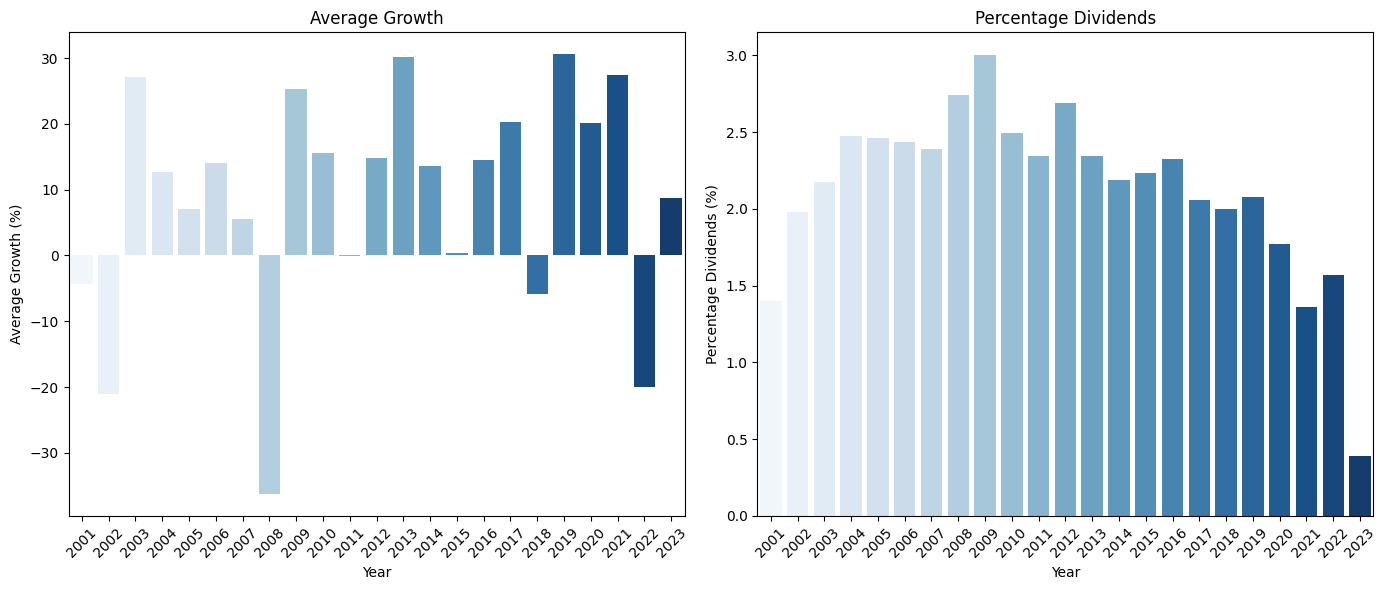

In [8]:
import seaborn as sns

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot the average_growth bar chart
sns.barplot(data=df_new, x=df_new.index, y='average_growth', palette="Blues", ax=ax1)
ax1.set_title('Average Growth')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Growth (%)')

# Plot the pct_div bar chart
sns.barplot(data=df_new, x=df_new.index, y='pct_div', palette="Blues", ax=ax2)
ax2.set_title('Percentage Dividends')
ax2.set_xlabel('Year')
ax2.set_ylabel('Percentage Dividends (%)')

# Rotate x-axis labels for better readability
ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


C:\Users\cni4\AppData\Local\Temp\ipykernel_4268\3460189037.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('YlGn')


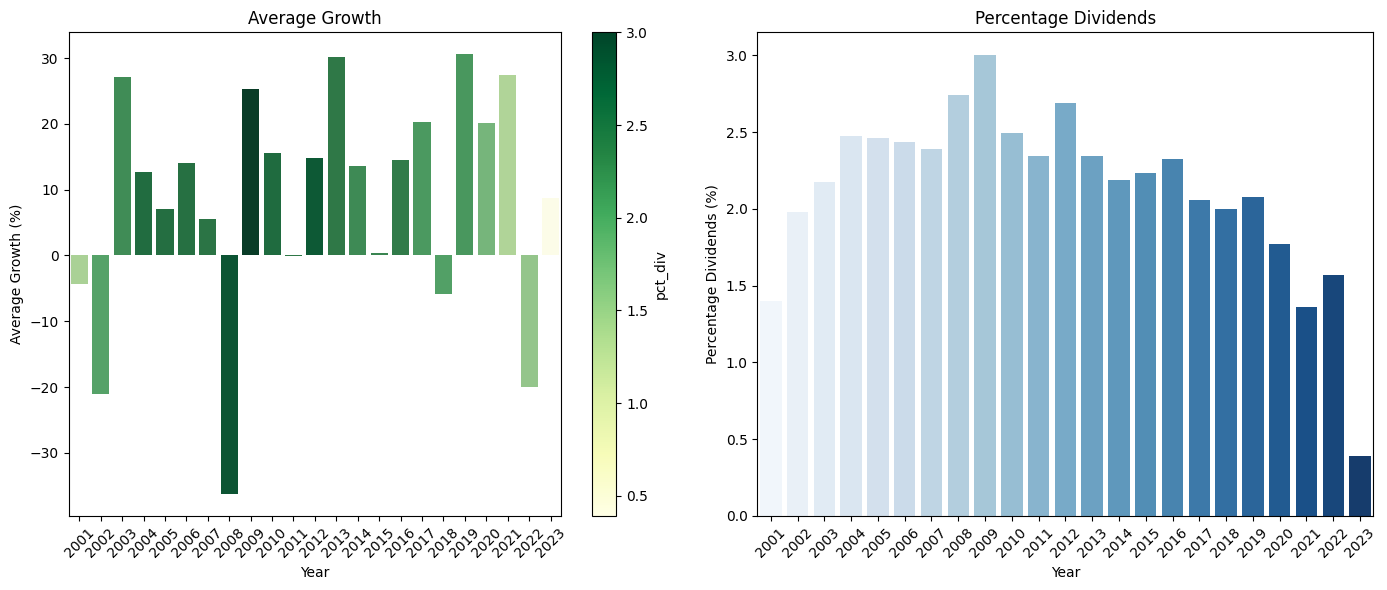

In [9]:
from matplotlib import cm, colors
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np

# Normalize 'pct_div' values to the range [0, 1]
scaler = MinMaxScaler()
df_new['pct_div_normalized'] = scaler.fit_transform(df_new[['pct_div']])

# Create a colormap
cmap = cm.get_cmap('YlGn')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot the average_growth bar chart with colors based on 'pct_div'
color_bars = sns.barplot(data=df_new, x=df_new.index, y='average_growth', 
                         palette=cmap(df_new['pct_div_normalized']), ax=ax1)
ax1.set_title('Average Growth')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Growth (%)')

# Plot the pct_div bar chart
sns.barplot(data=df_new, x=df_new.index, y='pct_div', palette="Blues", ax=ax2)
ax2.set_title('Percentage Dividends')
ax2.set_xlabel('Year')
ax2.set_ylabel('Percentage Dividends (%)')

ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()

# Create colorbar
norm = colors.Normalize(df_new['pct_div'].min(), df_new['pct_div'].max())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax1, orientation='vertical', label='pct_div')

plt.show()


# NLP

Text analysis

In [94]:
import os
import openai
import yaml
import json
OPENAI_API_KEY = yaml.safe_load(open("OPENAI_API_KEY.yaml"))
openai.api_key = OPENAI_API_KEY["API_key"]

In [95]:
def get_completion(prompt, model="gpt-3.5-turbo", temperature=0): 
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=temperature, 
    )
    return response.choices[0].message["content"]

In [96]:
msft_news=msft.news

In [97]:
#print(msft_news)

In [98]:
data_json = msft_news

prompt = f"""
Transform the following python dictionary from JSON to an HTML \
table with column headers and title: {data_json}
"""
response = get_completion(prompt)

In [99]:
from IPython.display import display, Markdown, Latex, HTML, JSON
#display(HTML(response))

In [100]:
# Extract publisher and title
News = [{"publisher": item['publisher'],"Related Tickers": item['relatedTickers'], "title": item['title']} for item in data_json]

In [106]:
Items=[]
for news in News:
    prompt = f"""
    Determine three main topics that are being discussed in the \
    following text, which is delimited by triple backticks.

    Make each item one or two words long. 

    Format your response as a list of items separated by commas.

    Text sample: '''{news['title']}'''
    """
    topics = get_completion(prompt)
    
    prompt = f"""
    Determine two sentiments that you find in the \
    following text, which is delimited by triple backticks.

    Make each item one or two words long. 

    Format your response as a list of items separated by commas.

    Text sample: '''{news['title']}'''
    """
    sentiments = get_completion(prompt)
    
    prompt = f"""
    Determine the overall sentiment that you find in the \
    following text, which is delimited by triple backticks.

    Format your response as a interger between 0 and 100.

    Text sample: '''{news['title']}'''
    """
    OAsentiment = get_completion(prompt)
    
    dict_news = {"publisher": news['publisher'], "topics": topics, "sentiments": sentiments, "overall_sentiment": OAsentiment}
    Items.append(dict_news)

In [107]:
Items

[{'publisher': 'Barrons.com',
  'topics': 'Amazon, Cloud Business, India',
  'sentiments': 'optimism, investment',
  'overall_sentiment': '70'},
 {'publisher': 'Fortune',
  'topics': 'Microsoft, Stock Price, Pay Raise',
  'sentiments': 'Ambition, Greed.',
  'overall_sentiment': '20'},
 {'publisher': 'Barrons.com',
  'topics': 'Apple, Product, Flops',
  'sentiments': 'Negative, skeptical.',
  'overall_sentiment': '20'},
 {'publisher': 'Yahoo Finance',
  'topics': 'Senators, Social Media, AI',
  'sentiments': 'Regret, determination.',
  'overall_sentiment': '50'},
 {'publisher': 'The Wall Street Journal',
  'topics': 'Microsoft, Skype, China',
  'sentiments': 'Fixing problem, Cooperation',
  'overall_sentiment': '50'},
 {'publisher': "Investor's Business Daily",
  'topics': 'Stocks, Technology, May',
  'sentiments': 'Optimism, recommendation.',
  'overall_sentiment': '50'},
 {'publisher': 'Bloomberg',
  'topics': 'Grammarly, AI, Expansion',
  'sentiments': 'Expansion, Ambition.',
  'over

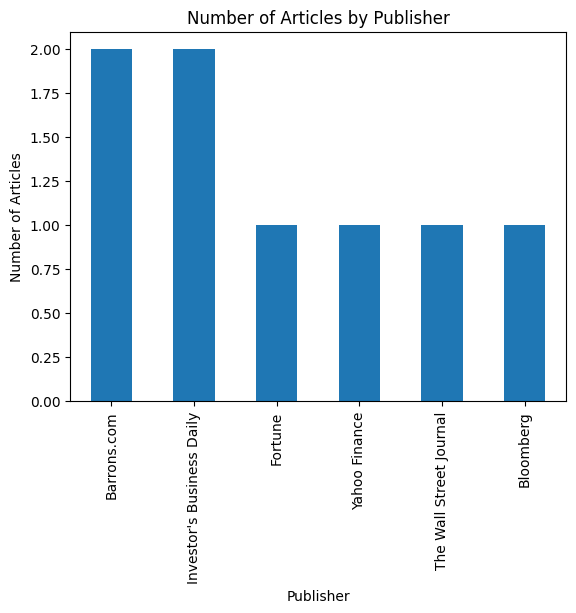

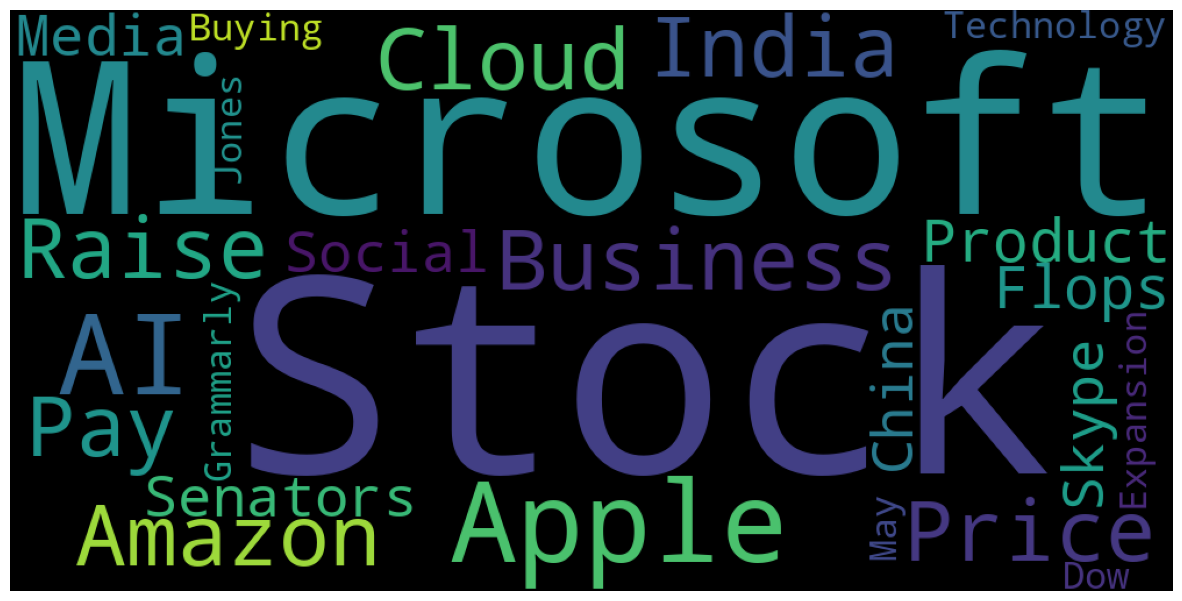

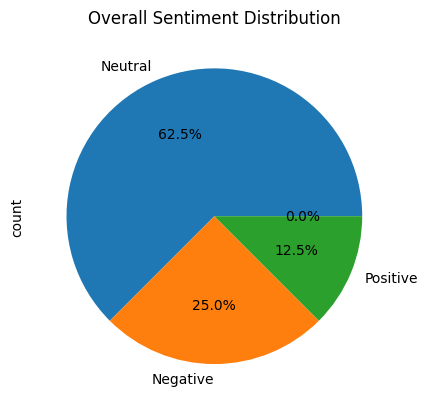

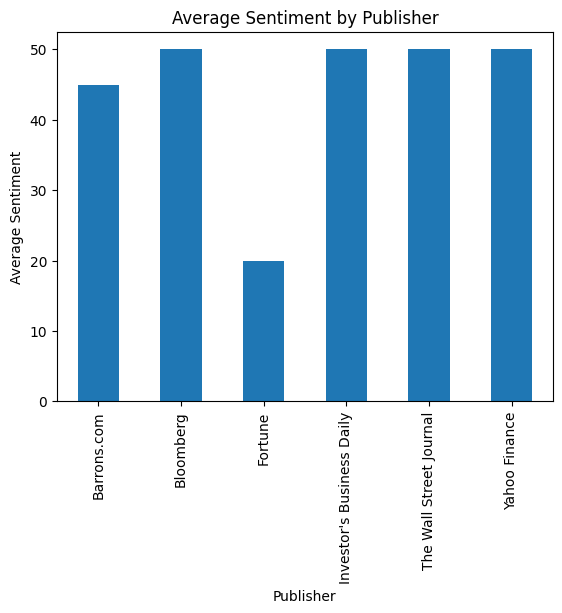

In [110]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

# assuming your data is stored in a variable called data
df = pd.DataFrame(Items)

# Bar chart of publishers
df['publisher'].value_counts().plot(kind='bar')
plt.title('Number of Articles by Publisher')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.show()

# Wordcloud of topics
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(df['topics']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Pie chart of overall sentiment
bins = pd.cut(df['overall_sentiment'].astype(int), bins=[0, 25, 50, 75, 100], labels=['Negative', 'Neutral', 'Positive', 'Very positive'])
bins.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Overall Sentiment Distribution')
plt.show()

# Bar chart of average sentiment per publisher
df['overall_sentiment'] = df['overall_sentiment'].astype(int)
df.groupby('publisher')['overall_sentiment'].mean().plot(kind='bar')
plt.title('Average Sentiment by Publisher')
plt.xlabel('Publisher')
plt.ylabel('Average Sentiment')
plt.show()
